In [120]:
import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt 

import seaborn as sns  

%matplotlib inline

import scipy as sp 


In [121]:
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

In [123]:
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [124]:
df=pd.read_csv("C:/Users/Admin/Downloads/dataset2.csv")
df

,Date,PetrolPrice,Price Date,Sl no.,District Name_x,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,District Name_y
0,01/01/2018,69.38,01/01/2018,35074.0,Banaskanth,Deesa,Wheat,Other,FAQ,1650.0,...,13.0,0.0,32.0,0.0,1012.0,30.0,10.0,109.0,9.0,Ahmedabad
1,02/01/2018,69.38,02/01/2018,44979.0,Panchmahals,Derol(Adadara),Wheat,Lokwan,FAQ,1690.0,...,22.0,0.0,28.0,0.0,1013.0,29.0,10.0,59.0,14.0,Ahmedabad
2,03/01/2018,69.38,03/01/2018,4069.0,Amreli,Amreli,Wheat,Rajasthan Tukdi,FAQ,1565.0,...,21.0,0.0,27.0,0.0,1013.0,30.0,10.0,95.0,12.0,Ahmedabad
3,04/01/2018,69.38,04/01/2018,60910.0,Panchmahals,Gogamba,Wheat,Other,FAQ,1550.0,...,13.0,0.0,25.0,0.0,1014.0,31.0,10.0,193.0,9.0,Ahmedabad
4,05/01/2018,69.38,05/01/2018,24595.0,Surendranagar,Chotila,Wheat,Hybrid,FAQ,1400.0,...,11.0,0.0,30.0,0.0,1013.0,30.0,10.0,186.0,8.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
print('Data Shape:', df.shape)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

Data Shape: (1581, 36)
There are 1581 rows and 36 columns


In [126]:
data=df.dropna()
data.head()

,Date,PetrolPrice,Price Date,Sl no.,District Name_x,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,District Name_y
0,01/01/2018,69.38,01/01/2018,35074.0,Banaskanth,Deesa,Wheat,Other,FAQ,1650.0,...,13.0,0.0,32.0,0.0,1012.0,30.0,10.0,109.0,9.0,Ahmedabad
1,02/01/2018,69.38,02/01/2018,44979.0,Panchmahals,Derol(Adadara),Wheat,Lokwan,FAQ,1690.0,...,22.0,0.0,28.0,0.0,1013.0,29.0,10.0,59.0,14.0,Ahmedabad
2,03/01/2018,69.38,03/01/2018,4069.0,Amreli,Amreli,Wheat,Rajasthan Tukdi,FAQ,1565.0,...,21.0,0.0,27.0,0.0,1013.0,30.0,10.0,95.0,12.0,Ahmedabad
3,04/01/2018,69.38,04/01/2018,60910.0,Panchmahals,Gogamba,Wheat,Other,FAQ,1550.0,...,13.0,0.0,25.0,0.0,1014.0,31.0,10.0,193.0,9.0,Ahmedabad
4,05/01/2018,69.38,05/01/2018,24595.0,Surendranagar,Chotila,Wheat,Hybrid,FAQ,1400.0,...,11.0,0.0,30.0,0.0,1013.0,30.0,10.0,186.0,8.0,Ahmedabad


In [127]:
data.dtypes

Date                          object
PetrolPrice                  float64
Price Date                    object
Sl no.                       float64
District Name_x               object
Market Name                   object
Commodity                     object
Variety                       object
Grade                         object
Min Price (Rs./Quintal)      float64
Max Price (Rs./Quintal)      float64
Modal Price (Rs./Quintal)    float64
maxtempC                     float64
mintempC                     float64
totalSnow_cm                 float64
sunHour                      float64
uvIndex                      float64
moon_illumination            float64
moonrise                      object
moonset                       object
sunrise                       object
sunset                        object
DewPointC                    float64
FeelsLikeC                   float64
HeatIndexC                   float64
WindChillC                   float64
WindGustKmph                 float64
c

In [128]:
data.isna().sum()

Date                         0
PetrolPrice                  0
Price Date                   0
Sl no.                       0
District Name_x              0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
maxtempC                     0
mintempC                     0
totalSnow_cm                 0
sunHour                      0
uvIndex                      0
moon_illumination            0
moonrise                     0
moonset                      0
sunrise                      0
sunset                       0
DewPointC                    0
FeelsLikeC                   0
HeatIndexC                   0
WindChillC                   0
WindGustKmph                 0
cloudcover                   0
humidity                     0
precipMM                     0
pressure                     0
tempC                        0
visibili

In [129]:
#df.fillna(0)

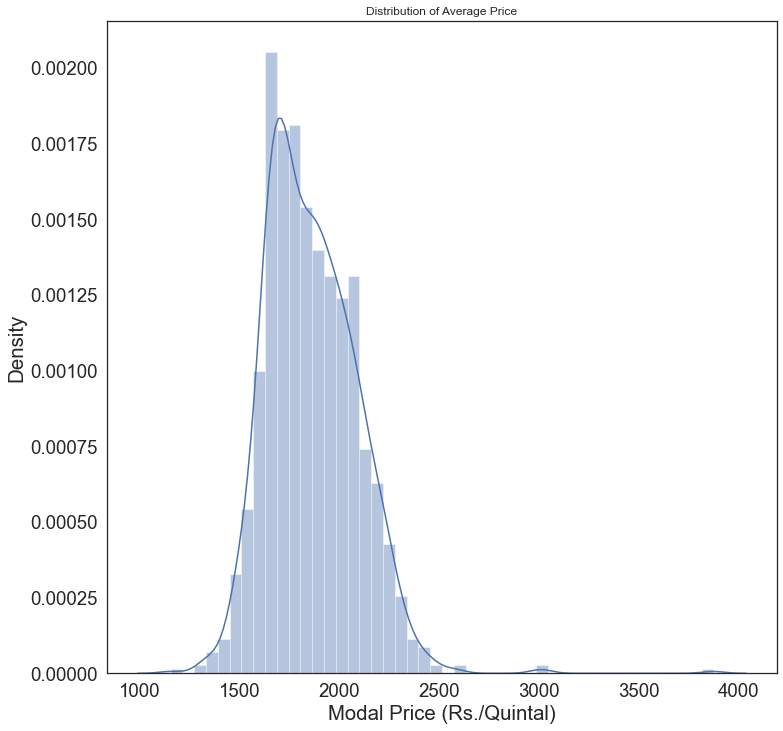

In [130]:
sns.set_style("white")

plt.figure(figsize=(12,12))
sns.distplot(data['Modal Price (Rs./Quintal)'])
plt.title("Distribution of Average Price",fontsize=12);


In [131]:
mean = data['Modal Price (Rs./Quintal)'].mean()
std = data['Modal Price (Rs./Quintal)'].std()
lower, upper = mean-std*2,mean+std*2 # Use 2*std and it will exclude data that is not included in 95% of data
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 1405.2495862527232 Upper Limit : 2315.669806664647


In [132]:
outliers = [x for x in data['Modal Price (Rs./Quintal)'] if x < lower or x > upper]
print("Outlier values : {}".format(outliers))

Outlier values : [1155.0, 3010.0, 2370.0, 2350.0, 3012.0, 2475.0, 1350.0, 2325.0, 2425.0, 3875.0, 2347.0, 2575.0, 2370.0, 2337.0, 2400.0, 2575.0, 2330.0, 2340.0, 2400.0, 2440.0, 2475.0, 2350.0, 2350.0, 2440.0, 1350.0, 1350.0, 2450.0, 2325.0, 1345.0, 2380.0, 1330.0, 1300.0, 1350.0]


In [133]:
len(data['District Name_x'].unique())

17

In [134]:
#District wise grouping
data.groupby('District Name_x').size() 

District Name_x
Ahmedabad         10
Amreli           126
Anand             18
Banaskanth       159
Bhavnagar         45
Botad             38
Dahod            102
Gandhinagar      138
Jamnagar          62
Junagarh          16
Kachchh            1
Kheda              9
Mehsana           32
Panchmahals      167
Rajkot           109
Sabarkantha      104
Surendranagar     50
dtype: int64

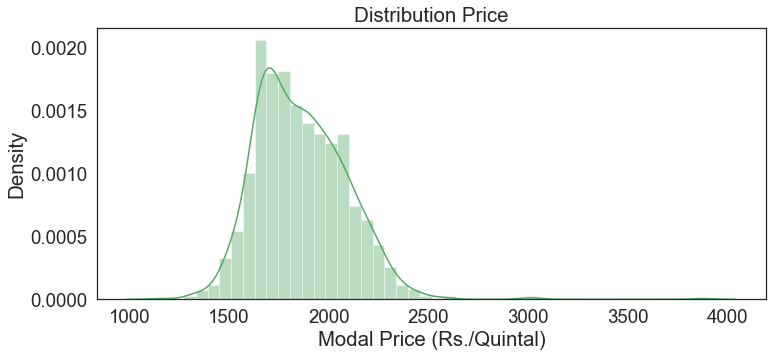

In [135]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(data['Modal Price (Rs./Quintal)'], color = 'g')

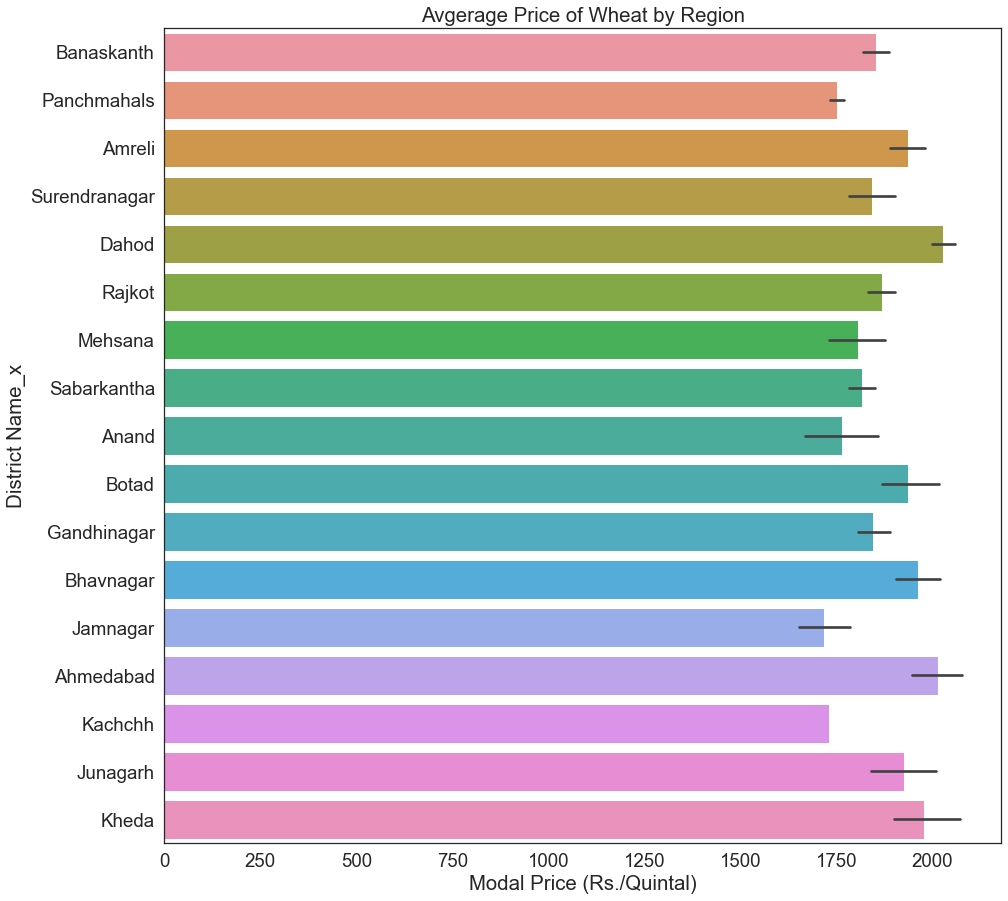

In [136]:
#Visulization of price
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Wheat by Region")

sns.barplot(x='Modal Price (Rs./Quintal)',y='District Name_x',data=data)

plt.show()

In [137]:
from datetime import datetime
data['Date'] =pd.to_datetime(data['Date'],format='%d/%m/%Y')
data['year']=data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
 # monday = 0
data['day of week'] = data['Date'].dt.dayofweek
dates = ['year','month', 'day', 'day of week']
data[dates]

,year,month,day,day of week
0,2018,1,1,0
1,2018,1,2,1
2,2018,1,3,2
3,2018,1,4,3
4,2018,1,5,4
...,...,...,...,...
1449,2021,12,20,0
1450,2021,12,21,1
1451,2021,12,22,2
1452,2021,12,23,3


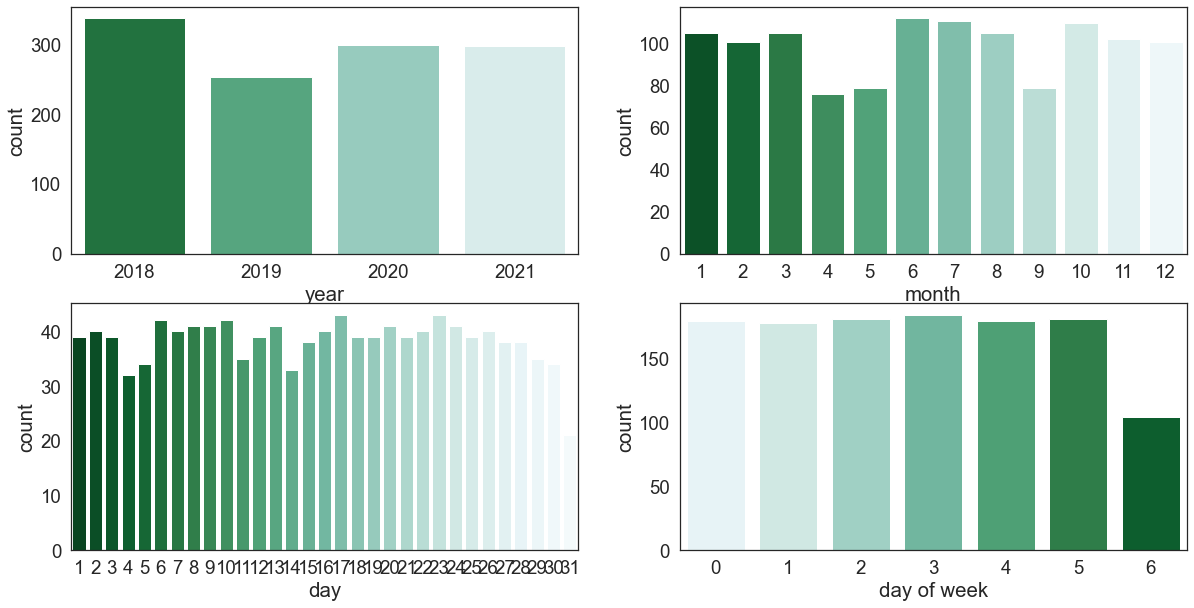

In [138]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=data, ax=ax[0,0], palette='BuGn_r')
sns.countplot('month', data=data, ax=ax[0,1], palette='BuGn_r')
sns.countplot('day', data=data, ax=ax[1,0], palette='BuGn_r')
sns.countplot('day of week', data=data, ax=ax[1,1], palette='BuGn')

plt.show()

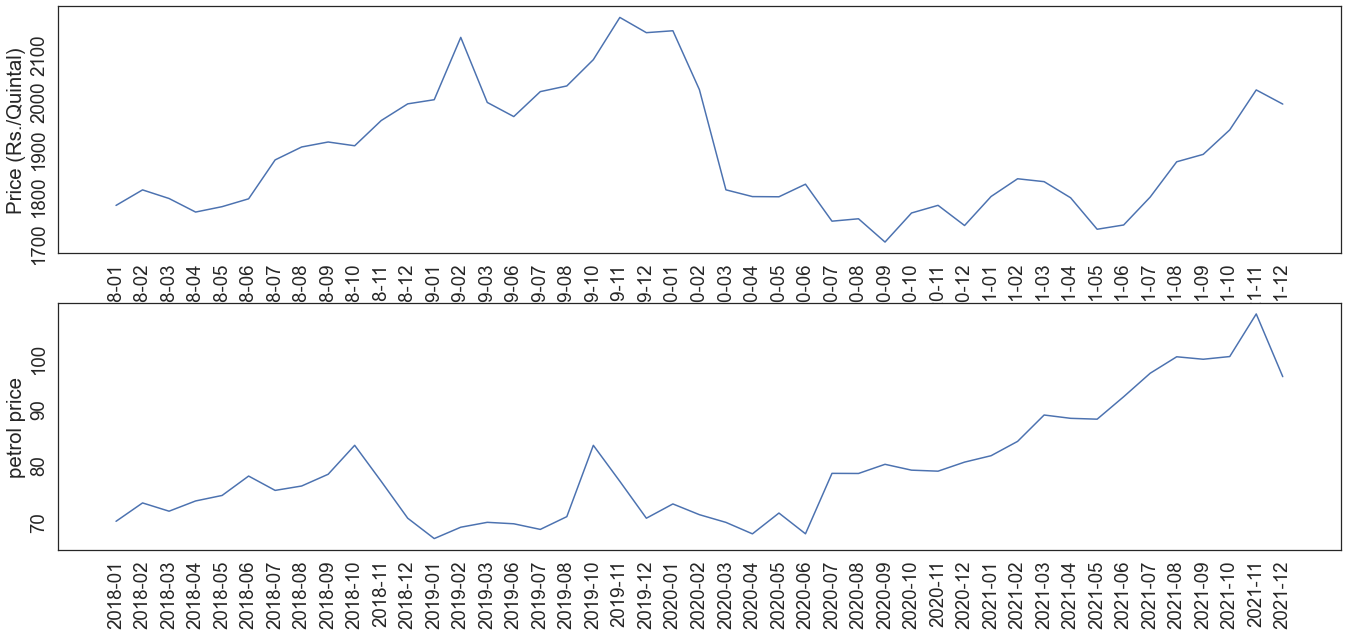

In [139]:
#impact of petrol price on modal price
fig, ax = plt.subplots(2, 1, figsize=(23,10))

data['year_month'] = data['Date'].dt.to_period('M')
grouped = data.groupby('year_month')[['Modal Price (Rs./Quintal)', 'PetrolPrice']].mean()

ax[0].plot(grouped.index.astype(str), grouped['Modal Price (Rs./Quintal)'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('Price (Rs./Quintal)')


ax[1].plot(grouped.index.astype(str), grouped['PetrolPrice'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('petrol price')

plt.show()

[]

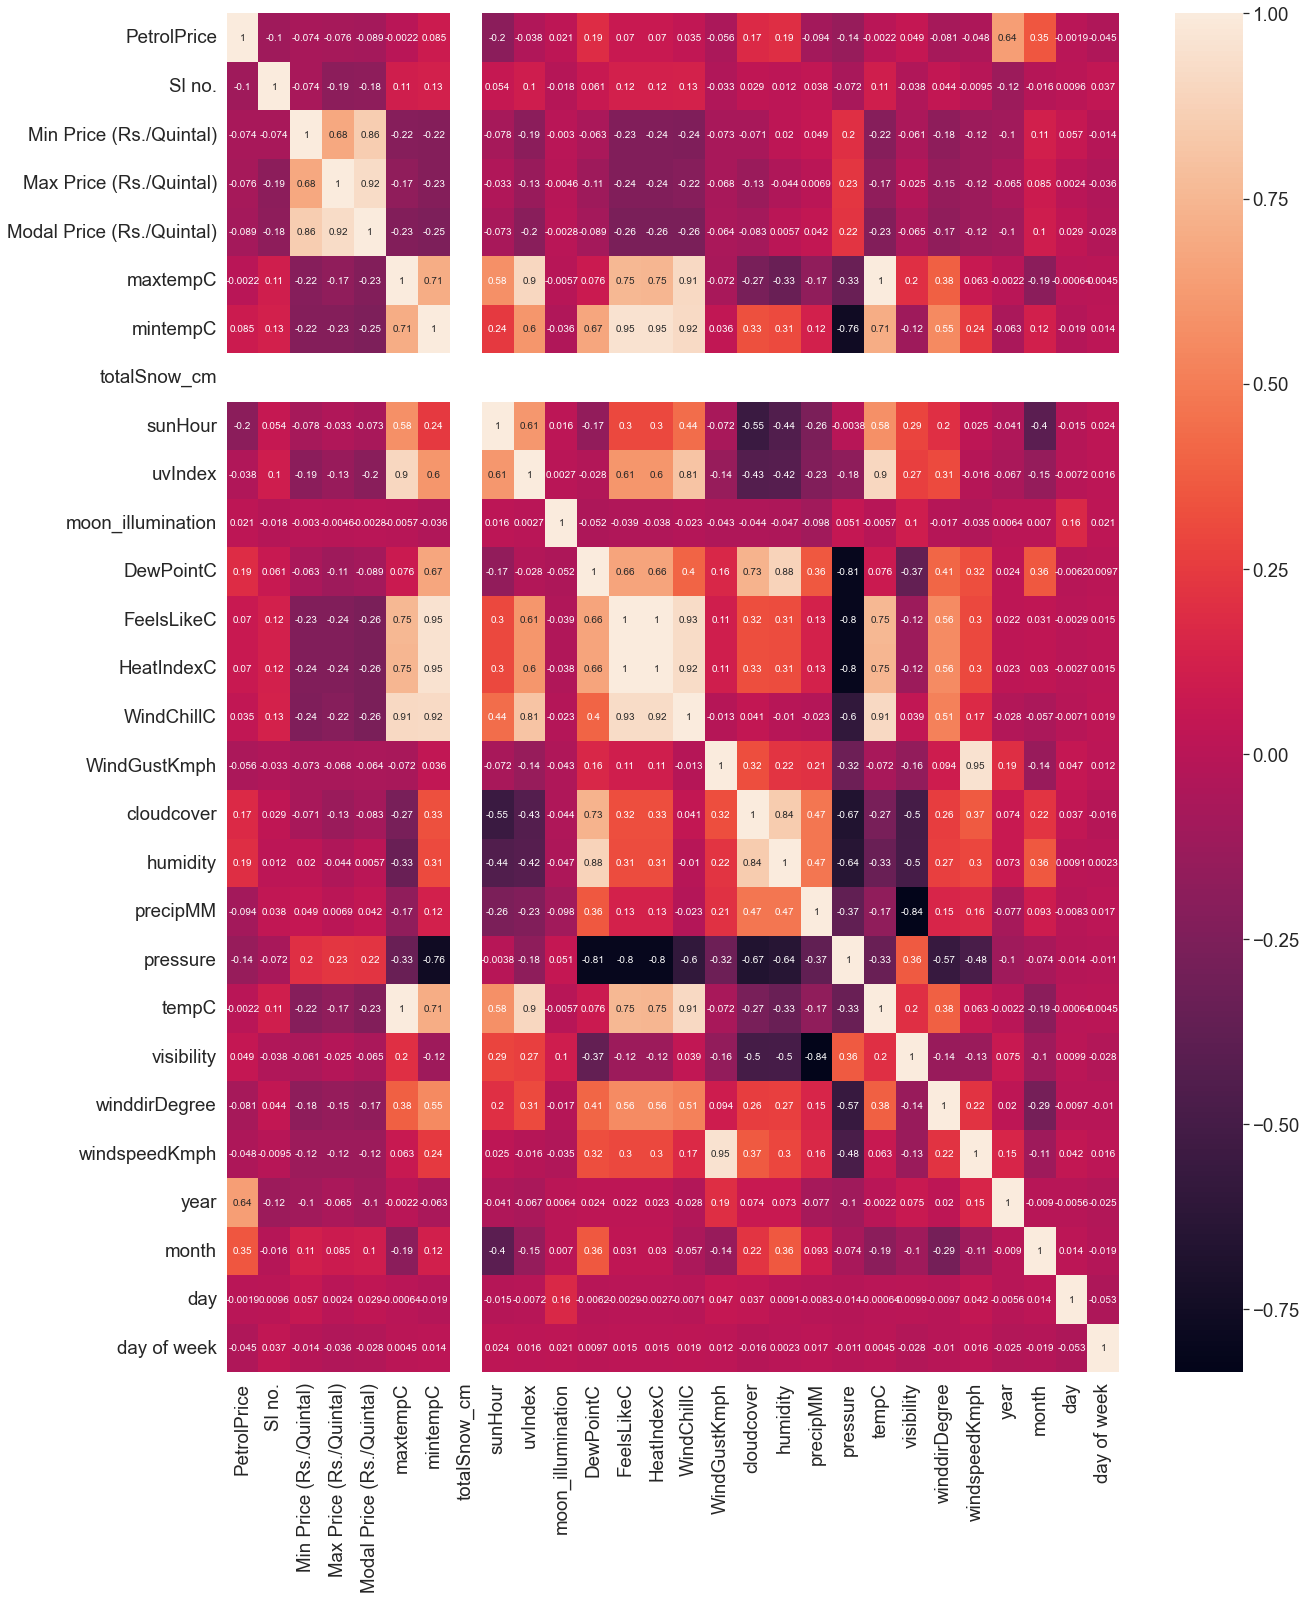

In [140]:
data_cor=data.corr()
plt.figure(figsize=(20,25))
sns.heatmap(data_cor,annot=True)
plt.plot()

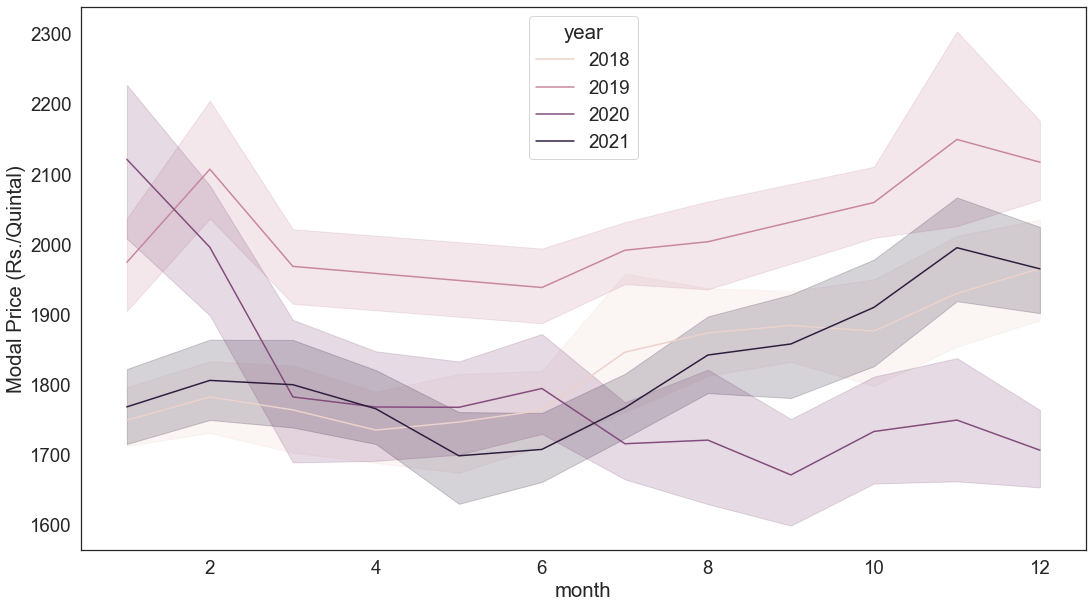

In [141]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="Modal Price (Rs./Quintal)", hue='year',  data=data)
plt.show()

In [142]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.Variety.drop_duplicates()) 
dicts['Variety'] = list(label.classes_)
data.Variety = label.transform(data.Variety) 

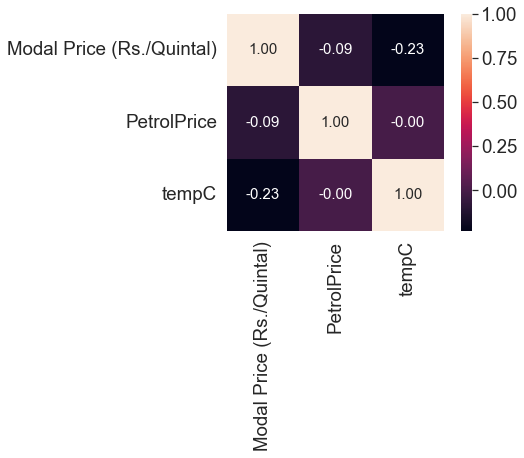

In [143]:
cols =['Modal Price (Rs./Quintal)','PetrolPrice','tempC']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [144]:
df3=pd.DataFrame(data,columns=['PetrolPrice','Modal Price (Rs./Quintal)','tempC','Date'])
df3

,PetrolPrice,Modal Price (Rs./Quintal),tempC,Date
0,69.38,1675.0,30.0,2018-01-01
1,69.38,1700.0,29.0,2018-01-02
2,69.38,1800.0,30.0,2018-01-03
3,69.38,1570.0,31.0,2018-01-04
4,69.38,1700.0,30.0,2018-01-05
...,...,...,...,...
1449,95.11,2000.0,30.0,2021-12-20
1450,95.11,2025.0,31.0,2021-12-21
1451,95.11,2165.0,32.0,2021-12-22
1452,95.11,2075.0,32.0,2021-12-23


In [145]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#df['District Name_x']=le.fit_transform(df['District Name_x'])
df3['Date']=le.fit_transform(df3['Date'])


In [213]:
from sklearn.model_selection import train_test_split
ft1=df3.drop(['Modal Price (Rs./Quintal)'],axis=1)
tg1=df3[['Modal Price (Rs./Quintal)']]
input_train,input_test,target_train,target_test=train_test_split(ft1,tg1,test_size=0.2)

# Linear Regression

In [208]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(input_train,target_train)
prediction= model.predict(input_test)
prediction

import math

mse = mean_squared_error(prediction, target_test)
rmse_1 = math.sqrt(mse)

mape_1 = mean_absolute_percentage_error(prediction, target_test)
r_1 = r2_score(prediction, target_test)

print('RMSE: ', rmse_1)
print('MAPE: ', mape_1*100)
print('R2 score: ',r_1)

RMSE:  210.32105664755608
MAPE:  9.174388420638712
R2 score:  -13.344262152908223


# Wheat Price in January 2023 (Winter)

In [148]:
new_data=[[100,10,2023/1/1]]

In [152]:
model.predict(new_data)

array([[2107.21441528]])

# Wheat Price in April 2023 (Summer)

In [153]:
new_data=[[96,40,2023/4/1]]

In [154]:
model.predict(new_data)

array([[1782.33633237]])

# Wheat Price in August 2023 (Monsoon)

In [155]:
new_data=[[96,29,2023/8/1]]

In [156]:
model.predict(new_data)

array([[1924.23582217]])

# Highest Petrol Price

In [165]:
new_data=[[105,35,2023/5/1]]

In [167]:
model.predict(new_data)

array([[1836.55427165]])

# Least Petrol Price

In [159]:
new_data=[[96.25,40,2023/5/1]]

In [160]:
model.predict(new_data)

array([[1784.70583889]])

# SVR

In [161]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'rbf')

svr.fit(input_train, target_train)

y_preds = svr.predict(input_test)

import math

mse = mean_squared_error(y_preds, target_test)
rmse_2 = math.sqrt(mse)
mape_2 = mean_absolute_percentage_error(y_preds, target_test)
r_2 = r2_score(y_preds, target_test)

print('RMSE: ', rmse_2)
print('MAPE: ', mape_2*100)
print('R2 score: ',r_2)

RMSE:  256.1441055687861
MAPE:  10.13242460202466
R2 score:  -107.89288037202222


# XGBoost

In [214]:
from xgboost import XGBRegressor

x = XGBRegressor()
x.fit(input_train, target_train)

y_preds = x.predict(input_test)
import math

mse = mean_squared_error(y_preds, target_test)
rmse_7 = math.sqrt(mse)
mape_7 = mean_absolute_percentage_error(y_preds, target_test)
r_7 = r2_score(y_preds, target_test)


print('RMSE: ', rmse_7)
print('MAPE: ',mape_7*100)
print('r2 score: ',r_7)

RMSE:  216.08751505066365
MAPE:  7.736759123525773
r2 score:  -0.555286064434978
